## Table of Contents
* [1. compositon](#1.-compositon)
	* [1.1 characters](#1.1-characters)
	* [1.2 objects](#1.2-objects)
	* [1.3 descriptions](#1.3-descriptions)
* [2. avg appearance](#2.-avg-appearance)
* [3. common entities](#3.-common-entities)
	* [3.1 characters](#3.1-characters)
	* [3.2 objects](#3.2-objects)
* [4. common verbs](#4.-common-verbs)
* [5. corpus level](#5.-corpus-level)
* [6. trajectories](#6.-trajectories)
* [7. location heatmaps](#7.-location-heatmaps)
* [8. improve segmentation](#8.-improve-segmentation)
	* [8.1 quantize pixels](#8.1-quantize-pixels)
	* [8.2 waterfall](#8.2-waterfall)
	* [8.3 direct from clusters](#8.3-direct-from-clusters)
	* [8.4 hybrid method](#8.4-hybrid-method)
	* [8.5 compare methods](#8.5-compare-methods)
	* [8.6 exp on single](#8.6-exp-on-single)
	* [8.7 labelme annotation](#8.7-labelme-annotation)
* [9. hide](#9.-hide)


In [1]:
%%capture
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import functools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

import copy
import os
import json
from tqdm import tqdm as tqdm

from IPython.display import Image
import PIL.Image as pil
import random
import cv2
import matplotlib as mpl
mpl.use("Agg")
import matplotlib.pylab as plt
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default
#%base16_mplrc dark solarized
plt.rcParams['grid.linewidth'] = 0
plt.rcParams['figure.figsize'] = (16.0, 10.0)

from anigen_tools.dataset import FlintstonesDataset
from anigen_tools.mturk import unpickle_this, pickle_this
from anigen_tools.trajectory_viz import filter_chars, filter_description
from anigen_tools.trajectory_viz import avg_video_appearance
from anigen_tools.trajectory_viz import draw_trajectory_set
from anigen_tools.trajectory_viz import vid_filter

In [2]:
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.linewidth'] = 1

plt.rc('font',**{'family':'serif','serif':['Times']})
# plt.rc('font', family='serif')
# plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})

plt.rc('text', usetex=True)

In [4]:
dataset = unpickle_this('../build_dataset/complete_ds_checkpoint_v2p8.pkl')

In [5]:
def get_vid(video_id, dataset=dataset):
    return [vid for vid in dataset if vid.gid() == video_id][0]

def make_standard_fig(fig_plt, fig_labels=None, save = False, outfile='fig.pdf', main_color=None, label_color = '0.25'):
    if fig_labels:
        if 'fig_title' in fig_labels:
            plt.title(fig_labels['fig_title'], fontsize=35, verticalalignment='bottom', color=label_color)
        if 'y_label' in fig_labels:
            plt.ylabel(fig_labels['y_label'], fontsize=35, labelpad=10, color=label_color)
        if 'x_label' in fig_labels:
            plt.xlabel(fig_labels['x_label'], fontsize=30, labelpad=10, color=label_color)
    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=23)
    if save:
        plt.savefig(outfile, bbox_inches='tight')

# 1. compositon

## 1.1 characters

In [8]:
vid_count = len(dataset)

In [9]:
char_counts = pd.Series([len(vid.data()['characters']) for vid in dataset])
count_dist = char_counts.value_counts()
norm_count_dist = count_dist / count_dist.sum()

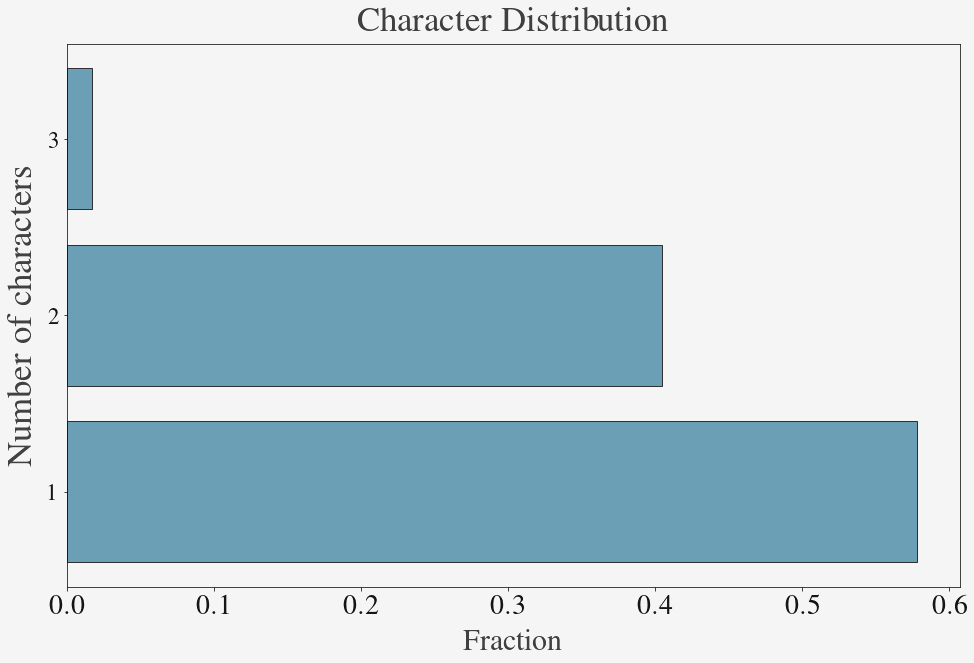

In [10]:
fig_labels = {
    'fig_title': 'Character Distribution', 
    'x_label': 'Fraction',
    'y_label': 'Number of characters'
}

fig = plt.barh(norm_count_dist.index, norm_count_dist.values)
_ = make_standard_fig(fig, fig_labels, save=False)
_ = plt.yticks(np.arange(1, 4, 1))

## 1.2 objects

In [11]:
obj_counts = pd.Series([len(vid.data()['objects']) for vid in dataset])
o_count_dist = obj_counts.value_counts()
norm_o_count_dist = o_count_dist / o_count_dist.sum()

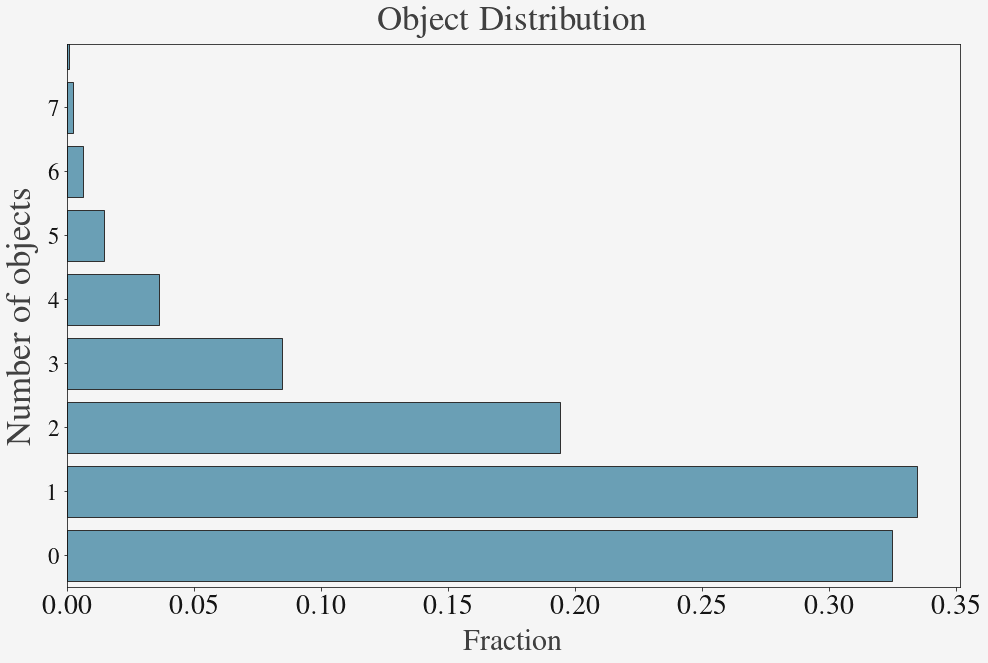

In [12]:
fig_labels = {
    'fig_title': 'Object Distribution', 
    'x_label': 'Fraction',
    'y_label': 'Number of objects'
}

fig = plt.barh(norm_o_count_dist.index, norm_o_count_dist.values)
_ = make_standard_fig(fig, fig_labels, save=True)
_ = plt.yticks(np.arange(0, 8, 1))
_ = plt.ylim(-0.5, 8)

## 1.3 descriptions

In [13]:
desc_lens = pd.Series([len(vid.description().split()) for vid in dataset])

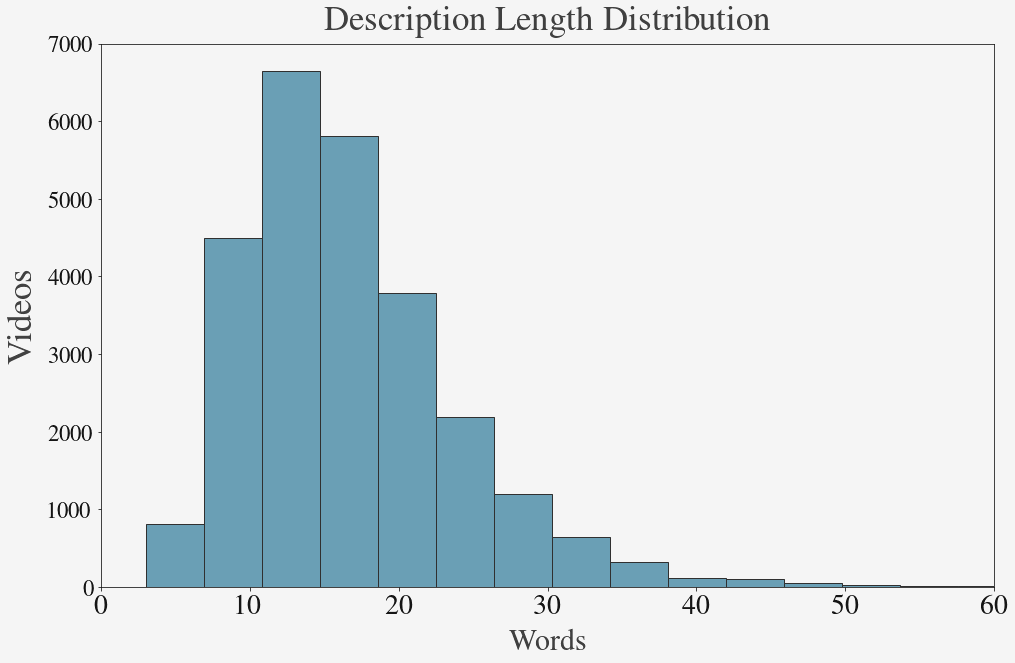

In [14]:
fig_labels = {
    'fig_title': 'Description Length Distribution', 
    'x_label': '# Words',
    'y_label': '# Videos'
}

fig = desc_lens.hist(bins=20)
_ = make_standard_fig(fig, fig_labels, save=False)
# _ = plt.yticks(np.arange(0, 8, 1))
_ = plt.xlim(0, 60)
_ = plt.ylim(0, 7000)

# 2. avg appearance

In [484]:
# filters_to_apply = [functools.partial(filter_chars, n_chars=1, chars_required=['fred']), functools.partial(filter_description, contains=['phone', 'picks up'])]
# vid_list = [vid for vid in dataset if vid_filter(vid, filters_to_apply)]

In [466]:
# avg_video_appearence(vid_list, 1)

# 3. common entities

## 3.1 characters

In [278]:
all_chars = [char for vid in dataset for char in vid.data()['characters']]
all_char_labels = pd.Series([char.data()['entityLabel'] for char in all_chars])
all_char_labels.value_counts()[:30]

fred                   13661
barney                  7386
wilma                   5853
betty                   3194
dino                     667
pebbles                  557
mr slate                 534
bamm bamm                 76
construction worker       65
hoppy                     53
baby puss                 49
Fred                      43
police officer            42
man                       42
circus performer          31
old man                   29
doctor                    24
man with blue dress       24
policeman                 21
the great gazoo           20
police man                19
bird                      19
Barney                    19
man in blue shirt         17
man with glasses          16
Mr. Slate                 16
nurse                     15
man with bow tie          14
man with blue shirt       14
woman                     13
dtype: int64

## 3.2 objects

In [308]:
all_objects = [char for vid in dataset for char in vid.data()['objects']]
all_obj_labels = pd.Series([char.data()['entityLabel'] for char in all_objects])
all_obj_labels.value_counts()[50:100]

clothes         109
tree            103
tv              102
plate            98
shoulders        96
stick            95
helmet           94
house            91
nose             91
seat             89
bow tie          87
hammock          85
object           85
cup              82
chest            82
feet             81
beard            81
chairs           79
bowling ball     79
box              79
mask             77
money            76
sunglasses       75
apron            75
horns            74
legs             74
bone             74
water            74
club             73
bench            72
scarf            72
foot             71
counter          70
dinosaur         66
sofa             66
microphone       64
piano            64
hammer           64
costume          61
tail             60
mirror           60
picture          60
fingers          59
fist             59
suit             58
uniform          57
rope             57
towel            56
sign             53
knife            52


In [ ]:
cv2.grabCut()

# 4. common verbs

# 5. corpus level

In [126]:
import nltk
import spacy
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [167]:
from nltk import BigramCollocationFinder

In [128]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [151]:
cached_sw = set(stopwords.words('english'))
cached_sw.update(list(string.punctuation))

In [155]:
main_characters_lower = {
            "fred",
            "wilma",
            "mr slate",
            "barney",
            "betty",
            "pebbles",
            "dino",
            "baby puss",
            "hoppy",
            "bamm bamm",
        }

In [127]:
vid_descriptions_raw = [vid.description() for vid in dataset]

In [136]:
description_corpus = ' '.join(vid_descriptions_raw)

In [139]:
tokenized_corpus = word_tokenize(description_corpus)

In [164]:
normalized_tokens = []
for toke in tokenized_corpus:
    clean_toke = toke.strip().lower()
    if clean_toke not in cached_sw and clean_toke not in main_characters_lower:
        normalized_tokens.append(clean_toke)

In [165]:
dc_freq_d = nltk.FreqDist(normalized_tokens)
most_common_words = dc_freq_d.most_common(20)

In [166]:
most_common_words

[('room', 13257),
 ('talking', 8965),
 ('standing', 6382),
 ('living', 4274),
 ('sitting', 3487),
 ('man', 3459),
 ('someone', 2934),
 ('outside', 2864),
 ('holding', 2620),
 ('speaking', 2475),
 ('car', 1915),
 ('talks', 1821),
 ('speaks', 1715),
 ('wearing', 1704),
 ('blue', 1698),
 ('head', 1673),
 ('looks', 1664),
 ('looking', 1578),
 ('something', 1570),
 ('doorway', 1527)]

In [168]:
phrase_bi_finder = BigramCollocationFinder.from_words(normalized_tokens)

In [169]:
phrase_bi_finder.apply_freq_filter(75) 

In [170]:
most_common_bigrams = []

for k,v in sorted(phrase_bi_finder.ngram_fd.items(), key=lambda x:x[1], reverse=True)[:15]:
    most_common_bigrams.append((' '.join(k), v))

In [171]:
most_common_bigrams

[('living room', 4266),
 ('room talking', 2399),
 ('standing room', 2090),
 ('talking someone', 1593),
 ('dining room', 756),
 ('mr slate', 706),
 ('room standing', 652),
 ('room speaking', 647),
 ('standing outside', 607),
 ('standing living', 602),
 ('talking room', 580),
 ('standing doorway', 575),
 ('room holding', 571),
 ('says something', 558),
 ('talking standing', 543)]

In [173]:
phrase_bi_finder.nbest(bigram_measures.pmi, 20)

[('construction', 'worker'),
 ('golf', 'course'),
 ('police', 'officer'),
 ('bowling', 'alley'),
 ('bow', 'tie'),
 ('bamm', 'bamm'),
 ('bowling', 'ball'),
 ('eyes', 'closed'),
 ('arms', 'crossed'),
 ('mr', 'slate'),
 ('closes', 'eyes'),
 ('watching', 'tv'),
 ('hands', 'hips'),
 ('reading', 'book'),
 ('says', 'something'),
 ('camera', 'left'),
 ('laying', 'bed'),
 ('bed', 'bedroom'),
 ('saying', 'something'),
 ('camera', 'right')]

In [274]:
phrase_bi_finder.score_ngram(bigram_measures.pmi, 'bed', 'bedroom')

6.437502853264231

In [271]:
import gensim

from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

In [240]:
vid_docs = [[w.lower().strip() for w in word_tokenize(vd) if w not in cached_sw] for vd in vid_descriptions_raw]

In [241]:
bigram = Phrases(vid_docs, scoring='npmi', threshold=-1)

In [242]:
bigram_phraser = Phraser(bigram)

In [254]:
bigram_phraser.score_item('', '', scorer='npmi', components=[b'barney', b'walks'])

(b'barney', b'walks')


0.0939014438087678

In [255]:
# bigram[['fred', 'walks', 'in']]

In [270]:
bigram_phraser.score_item('', '', scorer='npmi', components=[b'sitting', b''])

(b'sitting', b'car')


0.3520796607731733

# 6. trajectories

In [5]:
object_of_interest = 'couch'

In [6]:
filters_to_apply = [functools.partial(filter_description, contains=[object_of_interest])]
# filters_to_apply = [functools.partial(filter_chars, n_chars=1, chars_required=['wilma']), functools.partial(filter_description, contains=['walk'])]
vid_list = [vid for vid in dataset if vid_filter(vid, filters_to_apply)]
len(vid_list)

650

In [7]:
avg_image = avg_video_appearance(vid_list)

100%|██████████| 650/650 [00:16<00:00, 38.42it/s]


In [371]:
%%capture
test_draw = draw_trajectory_set(vid_list, object_of_interest, ent_type='objects', avg_img=avg_image, mag=0.5)
# test_draw = draw_trajectory_set(vid_list, 'hat', ent_type='objects', avg_img=avg_image, mag=0.5)
# test_draw = draw_trajectory_set(vid_list, 'wilma', ent_type='characters', avg_img=avg_image, mag=0.5)

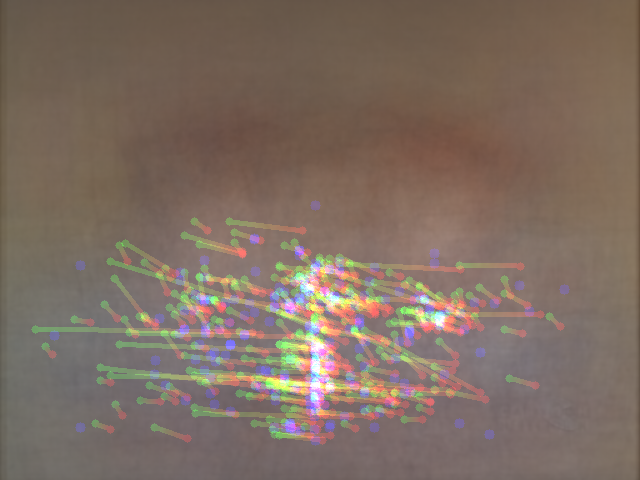

In [372]:
drawn_img = pil.fromarray(test_draw)
drawn_img

# 7. location heatmaps

In [8]:
data_dir = '/Users/schwenk/wrk/animation_gan/dataset/v2p0/trajectories'
tracking_dir = 'tracking'
segmentation_dir = 'segmentation'
frame_arr_dir = 'frame_arr_data'

o_size = (640, 480)

In [14]:
import seaborn as sbn

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [15]:
def average_ent_segments(ent_list):
    store_res = np.zeros((128, 128))
    for ent in ent_list:
        ent_mask = np.load(os.path.join(data_dir, segmentation_dir, ent.gid() + '_segm.npy.npz'))['arr_0'].astype(np.uint64)
        ent_mean = ent_mask.mean(axis=0)
        store_res += ent_mean
    return store_res / len(ent_list)

In [58]:
def make_heatmap(segm_avg):
    my_cmap = sns.light_palette("Navy", as_cmap=True)
    
    ent_hm = sbn.heatmap(segm_avg, cmap='viridis', vmin=0, vmax=1, cbar=False)
    ent_hm.axis('off')
    figure = ent_hm.get_figure()    
    
    canvas = FigureCanvas(figure)
    fig = Figure()
    ax = fig.gca()
    ax.axis('off')

    canvas.draw()  

    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.fromstring(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3) 

    single_row = image[500, :, 0]
    img_start_x = np.argmin(single_row == 245)
    img_end_x = np.argmax(single_row[img_start_x:] == 245) + img_start_x
    single_col = image[:, 200, 0]
    img_start_y = np.argmin(single_col == 245)
    img_end_y = np.argmax(single_col[img_start_y:] == 245) + img_start_y
    
    heatmap_cropped = image[img_start_y: img_end_y , img_start_x: img_end_x]
    heatmap_img = pil.fromarray(heatmap_cropped).resize((640, 480))
    return heatmap_img

def overlay_heatmap(avg_img, heatmap_img):
    avg_img = avg_img.convert("RGBA")
    hm_gray = np.array(heatmap_img.convert('L'))
    heatmap_img = heatmap_img.convert("RGBA")
    
    max_mag = hm_gray.max()
    min_mag = hm_gray.min()
    
    width, height = heatmap_img.size
    pixdata = heatmap_img.load()
    for y in range(height):
        for x in range(width):
            pixmag = hm_gray[y, x]
            alpha_val = int(255 * (pixmag - min_mag) / (max_mag - min_mag))
            pixdata[x, y] = (*pixdata[x, y][:-1], alpha_val)
    r, g, b, a = heatmap_img.split()
    heatmap_img = pil.merge("RGB", (r, g, b))
    mask = pil.merge("L", (a,))
    avg_img.paste(heatmap_img, (0, 0), mask)
    return avg_img

In [59]:
test_ents = [obj for vid in dataset for obj in vid.data()['objects'] if 'couch' in obj.data()['entityLabel']]
# test_ents = [obj for vid in dataset for obj in vid.data()['objects'] if 'hammer' in obj.data()['entityLabel']]

# avg_masks = average_ent_segments(tqdm(test_ents))

In [60]:
%%capture
avg_bg = pil.fromarray(avg_image)
heatmap = make_heatmap(avg_masks)

In [61]:
heatmap_viz = overlay_heatmap(avg_bg, heatmap)

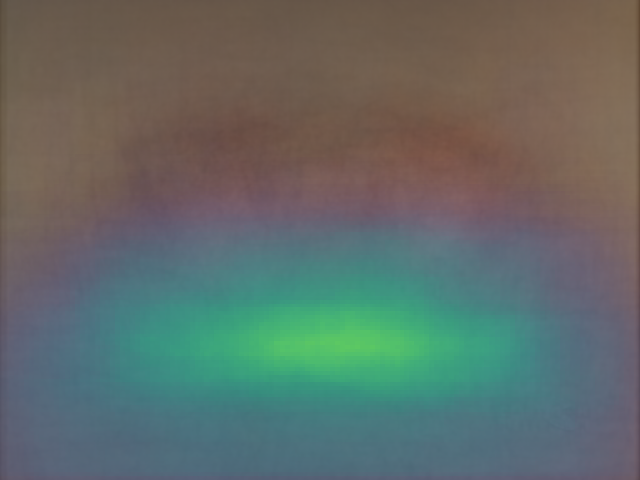

In [63]:
heatmap_viz

# 8. improve segmentation

## 8.1 quantize pixels

In [37]:
test_frames = dataset[2020].display_keyframes()

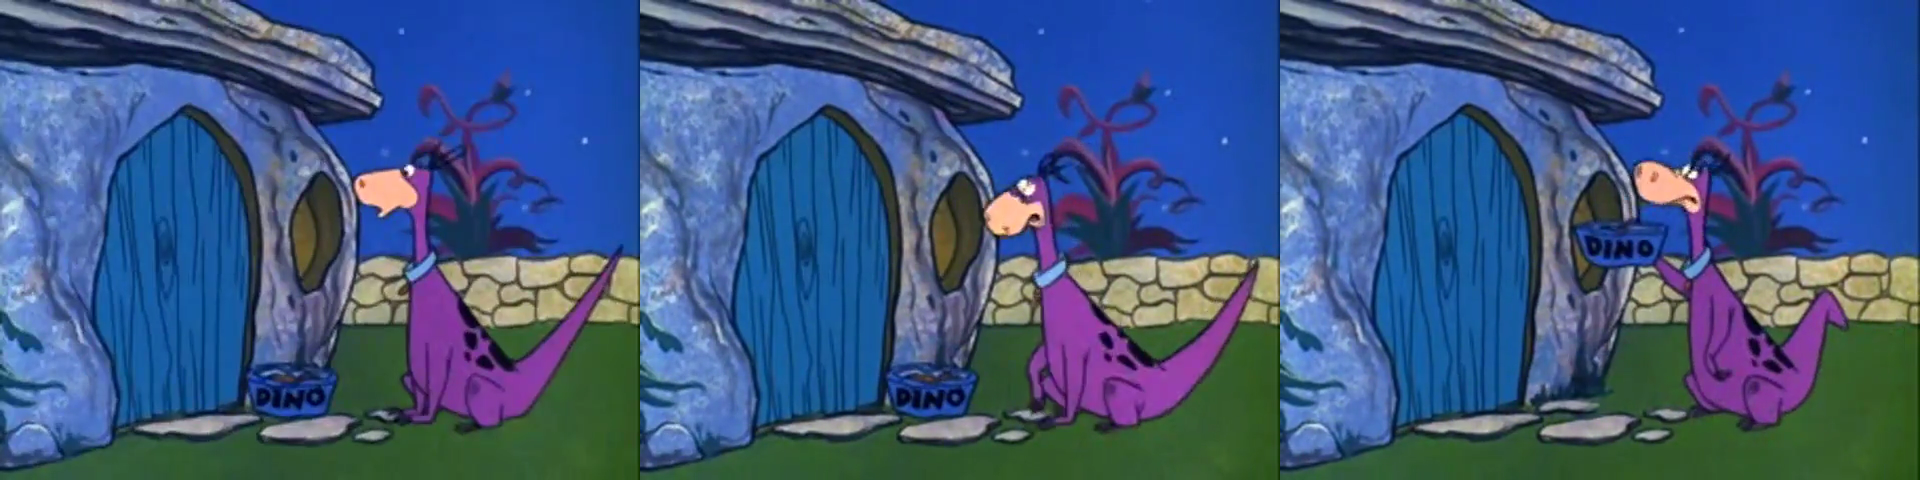

In [38]:
test_frames

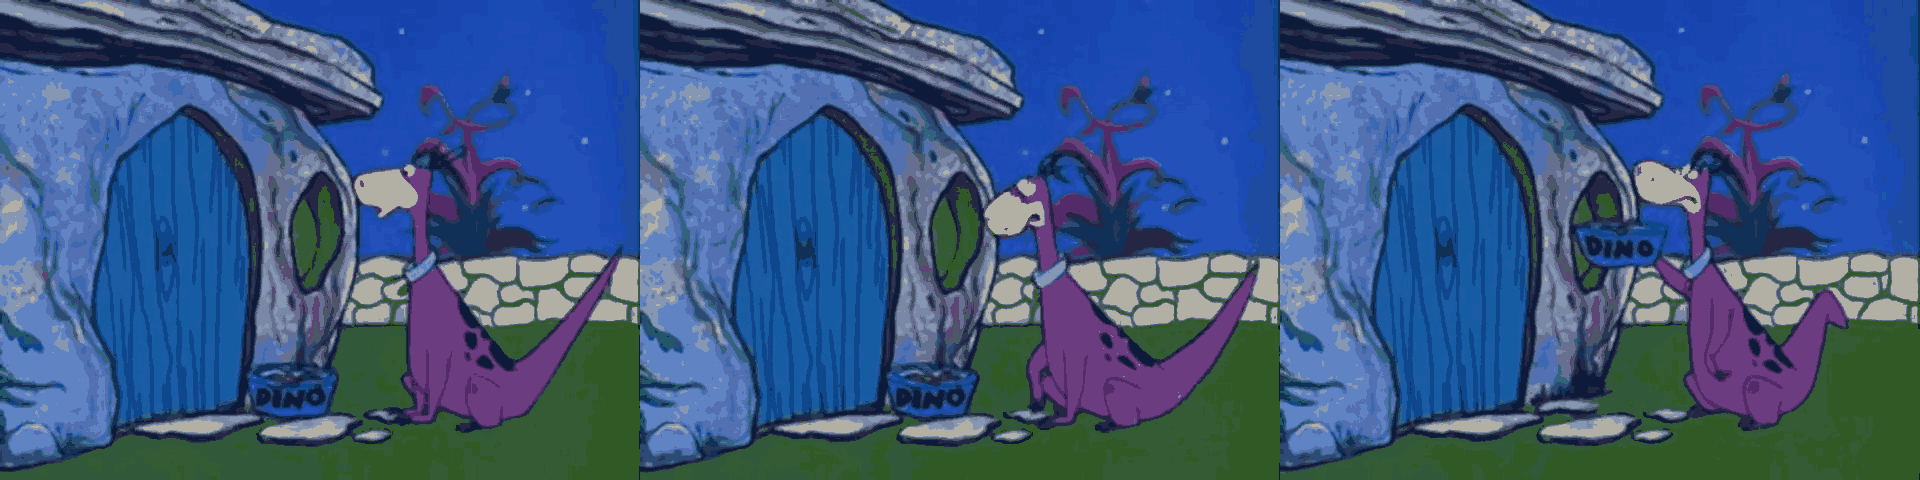

In [41]:
simplified = test_frames.convert('P', palette=pil.ADAPTIVE, colors=30)
simplified

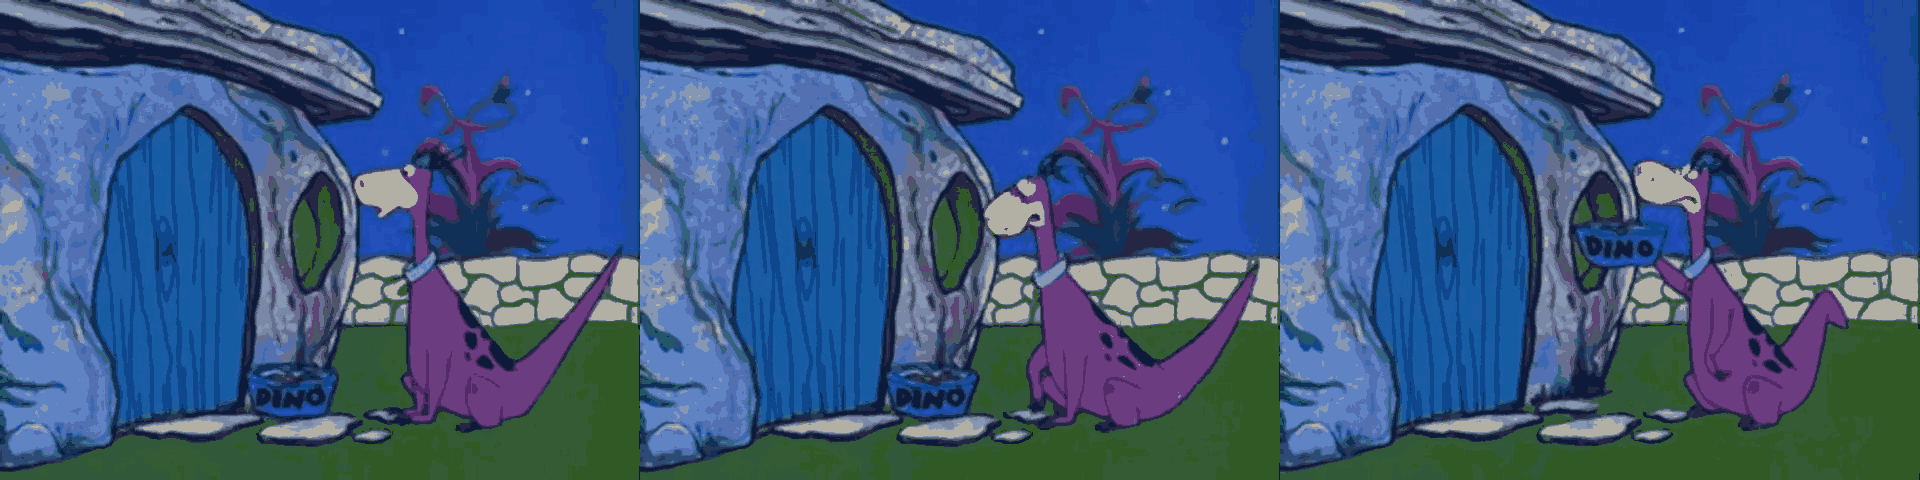

In [51]:
test_frames.quantize(colors=30, method=0)

In [36]:
frame_arr_dir = '/Users/schwenk/wrk/animation_gan/dataset/v2p0/trajectories/frame_arr_data/'

In [115]:
from sklearn.cluster import KMeans

In [158]:
def quant_img_kmeans_with_comp(image, n_clusters):
    simple_quant = pil.fromarray(image).quantize(colors=n_clusters, method=0)
    simple_convert = pil.fromarray(image).convert('P', palette=pil.ADAPTIVE, colors=n_clusters)
    h, w = image.shape[:2]
    image = cv2.cvtColor(test_128_img, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = n_clusters)
    labels = clt.fit_predict(image)
    quantized_img = clt.cluster_centers_.astype("uint8")[labels]
    quantized_img = quantized_img.reshape((h, w, 3))
    image = image.reshape((h, w, 3))
    quantized_img = cv2.cvtColor(quantized_img, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    simple_conversions = [np.array(img.convert('RGB')) for img in [simple_quant, simple_convert]]
    return pil.fromarray(np.hstack([image, quantized_img] + simple_conversions))

In [278]:
random_sample = random.sample(dataset, 14) + [test_vid]

In [156]:
for vid_id in tqdm(random_sample):
    segm_problem_video = vid_id.gid()
    test_arr_img = frame_arr_dir +segm_problem_video + '.npy'
    test_128_img = np.load(test_arr_img)[0]
    nc_quant_comps = [quant_img_kmeans_with_comp(test_128_img, nc) for nc in range(5, 55, 5)]
    img_comp_grid = pil.fromarray(np.vstack(nc_quant_comps))
    img_comp_grid.save('quant_comps/' + segm_problem_video + '.png')

100%|██████████| 13/13 [02:49<00:00, 13.01s/it]


In [227]:
from anigen_tools.segmentation import draw_video_segmentations
from anigen_tools.segmentation import segment_all_video_entities
from anigen_tools.segmentation import segment_from_quant_img

In [568]:
def quant_img_kmeans(image, clt, label_only=False):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    labels = clt.fit_predict(image)
    if label_only:
        return labels.reshape((128, 128))
    quantized_img = clt.cluster_centers_.astype('uint8')[labels]
    quantized_img = quantized_img.reshape((128, 128, 3))
    quantized_img = cv2.cvtColor(quantized_img, cv2.COLOR_LAB2BGR)
    return quantized_img

In [178]:
segm_problem_video = 's_01_e_03_shot_023155_023229'

test_vid = get_vid(segm_problem_video)
test_arr_img = np.load(frame_arr_dir +segm_problem_video + '.npy')

In [266]:
qat = quant_img_kmeans(test_arr_img[0], clt)

In [283]:
from tqdm import tqdm_notebook

In [295]:
for nc in tqdm_notebook([5, 15, 30]):
    clt = KMeans(n_clusters = nc)
    for vid_id in tqdm_notebook(random_sample[:5]):
        segm_problem_video = vid_id.gid()
        test_arr_file = frame_arr_dir + segm_problem_video + '.npy'
        test_arr_img = np.load(test_arr_file)
        quant_img = np.array([quant_img_kmeans(frame, clt) for frame in tqdm_notebook(test_arr_img)])
        np.save('quantized_images/' + segm_problem_video + '_clust_' + str(nc) + '.npy', quant_img)

HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

HBox(children=(IntProgress(value=0, max=15), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=15), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=15), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

HBox(children=(IntProgress(value=0, max=75), HTML(value='')))

In [ ]:
clt = KMeans(n_clusters = nc)

In [554]:
# quantized_frames = np.array([quant_img_kmeans(frame, clt) for frame in tqdm(test_arr_img)])

In [247]:
segment_from_quant_img(test_vid, quantized_frames)

In [251]:
draw_video_segmentations(test_vid, quantized_frames)

## 8.2 waterfall

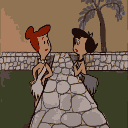

In [332]:
pil.fromarray(quantized_frames[0])

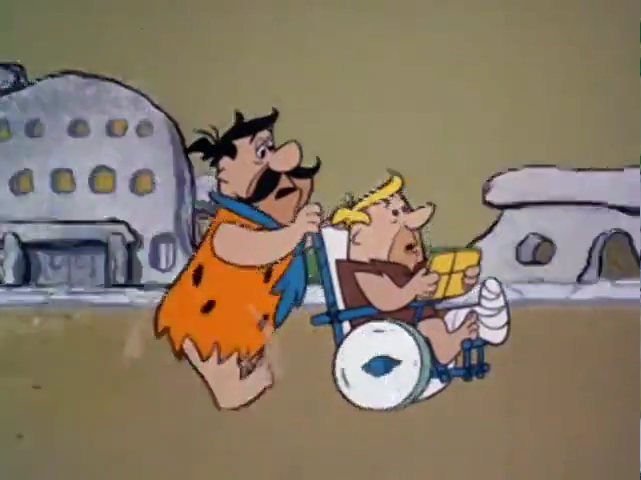

In [318]:
pil.fromarray(test_img)

In [352]:
clt = KMeans(n_clusters = 15)

orig_frames = quant_img_kmeans(test_arr_img[40], clt)

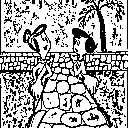

In [525]:
pil.fromarray(thresh)

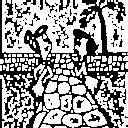

In [526]:
pil.fromarray(opening)

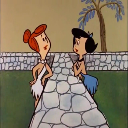

In [547]:
pil.fromarray(test_arr_img[40])

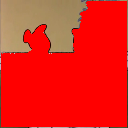

In [548]:
test_img = deepcopy(test_arr_img[40])
gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 3)

# test_img = np.array(test_vid.display_keyframes())[:, :641, :]
# ret, thresh = cv2.threshold(gray, 0, 255 , cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# thresh = cv2.adaptiveThreshold(test_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
#             cv2.THRESH_BINARY,11,2)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#             cv2.THRESH_BINARY,11,2)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel, iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(test_img, markers)

test_img[markers == 1] = [255,0,0]
pil.fromarray(test_img)

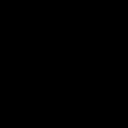

In [550]:
pil.fromarray(markers)

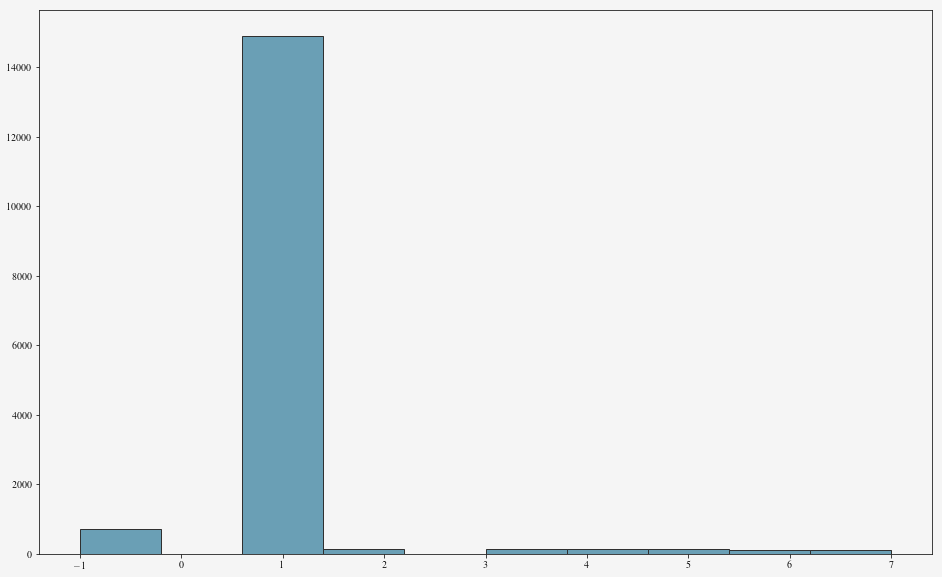

In [539]:
_ = pd.Series(markers.ravel()).hist()

## 8.3 direct from clusters

In [603]:
from pylab import imshow, show, get_cmap

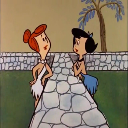

In [557]:
pil.fromarray(orig_frame)

In [1187]:
# test_vid.display_bounding_boxes()

In [864]:
clt = KMeans(n_clusters = 5)
img_clusters = quant_img_kmeans(orig_frame, clt, True)

In [636]:
from anigen_tools.segmentation import scale_box

In [1186]:
# _ = imshow(img_clusters, cmap=get_cmap("viridis"), interpolation='nearest')

In [1189]:
char_seg = create_entity_segment(test_char)

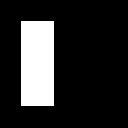

In [1190]:
pil.fromarray(convert_to_rgb(char_seg))

In [865]:
cluster_1 = img_clusters == 2
cluster_1 = cluster_1.astype(np.uint8)
cluster_1_disp = convert_to_rgb(cluster_1)

In [1191]:
# n_cc, markers = cv2.connectedComponents(cluster_1)

In [1192]:
# pil.fromarray(cluster_1_disp)

In [787]:
from  ai2.vision.utils.cv import area_intersect_over_union as aiou

In [911]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage import data, io, segmentation, color
from skimage.future import graph

In [880]:
n_segments = 100

In [ ]:
clt = KMeans(n_clusters = 15)
img_clusters = quant_img_kmeans(orig_frame, clt, False)

## 8.4 hybrid method

In [44]:
from anigen_tools.hybrid_segmentation import segment_entity
from anigen_tools.hybrid_segmentation import gen_single_segmentation
from anigen_tools.hybrid_segmentation import segment_video
from anigen_tools.segmentation import draw_video_segmentations

In [7]:
from skimage.segmentation import mark_boundaries
from skimage import color

from anigen_tools.hybrid_segmentation import create_bbox_segment
from anigen_tools.hybrid_segmentation import partition_image
from anigen_tools.hybrid_segmentation import rough_segment
from anigen_tools.hybrid_segmentation import grabcut_from_rough_mask
from anigen_tools.hybrid_segmentation import scale_box
from anigen_tools.hybrid_segmentation import compute_iou

In [8]:
from copy import deepcopy

In [9]:
def show_images_horizontally(images, ent_name):
    fig = plt.figure()
    for i, image in enumerate(images):
        a=fig.add_subplot(1,len(images), i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.savefig('./segmentation_comps/' + ent_name, bbox_inches='tight')

In [17]:
frame_arr_dir = '/Users/schwenk/wrk/animation_gan/dataset/v2p5/trajectories/frame_arr_data/'

In [11]:
def apply_mask(img, mask):
    return pil.fromarray(img * np.tile(np.expand_dims(mask, 2), [1, 1, 3]))

def convert_to_rgb(bin_img):
    return pil.fromarray(np.tile(np.expand_dims(bin_img * 255, 2), [1, 1, 3]))

In [52]:
# segm_problem_video = 's_01_e_03_shot_023155_023229'
# test_vid = get_vid(segm_problem_video)
# test_vid = random.choice(datset)
test_arr_img = np.load(frame_arr_dir +test_vid.gid() + '.npy')
test_frame = test_arr_img[40]
test_char = test_vid.data()['characters'][0]
# test_char = test_vid.data()['objects'][0]

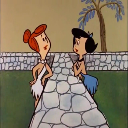

In [53]:
pil.fromarray(test_frame)

In [54]:
test_char_segm = gen_single_segmentation(test_vid, test_char, 100)
# convert_to_rgb(test_char_segm)

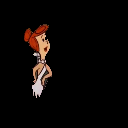

In [55]:
test_char_segm

In [57]:
# pil.fromarray(test_frame * np.tile(np.expand_dims(rough_ent, 2), [1, 1, 3]))

In [337]:
# test_vid.display_bounding_boxes()

In [14]:
segm_problem_video = 's_01_e_03_shot_023155_023229'
test_vid = get_vid(segm_problem_video)

In [58]:
# segment_video(test_vid, 1000)
# draw_video_segmentations(test_vid)

# test_seg = np.load('/Users/schwenk/wrk/animation_gan/analyze_ds/trajectories/segmentation/s_01_e_03_shot_023155_023229_char_0_segm.npy.npz')['arr_0']
# img_seq = [pil.fromarray(convert_to_rgb(test_seg[n])) for n in range(50, 60)]
# show_images_horizontally(img_seq)

## 8.5 compare methods

In [35]:
tanmay_res_dir_pow_2 = './tanmay_segmentations/scratch2_prob_unary_pow_2/'
tanmay_res_dir_pow_4 = './tanmay_segmentations/scratch2_prob_unary_pow_4/'
tanmay_res_dir_log_pow_2 = './tanmay_segmentations/scratch_prob_log_unary_pow_2//'
result_dirs = [tanmay_res_dir_pow_2, tanmay_res_dir_pow_4, tanmay_res_dir_log_pow_2]

In [13]:
seg_files_1 = os.listdir(tanmay_res_dir_pow_2)
seg_files_1 = [f for f in seg_files_1 if 'seg' in f]

In [14]:
ents_in_sample = [f.split('_seg')[0] for f in seg_files_1]

In [15]:
ents_in_sample[:1]

['s_01_e_27_shot_013211_013285_drum_0_8']

In [16]:
vids_in_sample = set(['_'.join(ent.split('_', maxsplit=7)[:7]) for ent in ents_in_sample])

In [162]:
for ent in ents_in_sample:
    try: 
        make_seg_comp(ent)
    except:
        pass 

In [32]:
def gen_single_segmentation(video, ent, n_segments=500, frame_n=30):
    test_arr_img = np.load(frame_arr_dir + video.gid() + '.npy')
    anim_frame = test_arr_img[frame_n]
    ent_rects = np.load('./trajectories/tracking/' + ent.gid() + '.npy')
    ent_rects = ent_rects[frame_n]
    img = deepcopy(anim_frame)
    scaled_ent_box = scale_box(ent_rects)
    ent_bbox_mask = create_bbox_segment(scaled_ent_box)
    img_regions = partition_image(img, n_segments)
    rough_ent = rough_segment(img_regions, ent_bbox_mask, 0.5)
    ent_segmentation = grabcut_from_rough_mask(rough_ent, img)
    return ent_segmentation, pil.fromarray(anim_frame * np.tile(np.expand_dims(ent_segmentation, 2), [1, 1, 3]))

In [33]:
def make_seg_comp(ent_id):
    vid_id = '_'.join(ent_id.split('_', maxsplit=7)[:7])
    video = get_vid(vid_id)
    entity = [ent for ent in video.data()['characters'] + video.data()['objects'] if ent.gid() == ent_id][0]
    dustins_seg =  gen_single_segmentation(video, entity, 500)
    tanmay_ent_img_seq = [pil.open(rd + ent_id + '_seg.png') for rd in result_dirs]
    _ = show_images_horizontally([dustins_seg] + tanmay_ent_img_seq, ent_id)

In [34]:
segm_problem_video = 's_01_e_03_shot_023155_023229'
test_vid = get_vid(segm_problem_video)
test_char = test_vid.data()['characters'][0]
seg_mask, single_seg = gen_single_segmentation(test_vid, test_char) 

NameError: name 'frame_arr_dir' is not defined

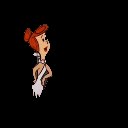

In [173]:
single_seg

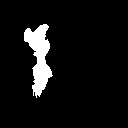

In [176]:
pil.fromarray(convert_to_rgb(seg_mask))

In [166]:
test_vid.get_key_frame_images()[0].save('test_frame.png')

with open('./test_frame.json') as f:
    labelme_anno = json.load(f)

wilma_poly = labelme_anno['shapes'][0]['points']

polyr, polyc = np.array(list(zip(*wilma_poly)), dtype=np.uint8)

from skimage.draw import polygon

labelme_mask = np.zeros_like(test_vid.get_key_frame_images()[0])

rr, cc = polygon(polyr, polyc)
labelme_mask[rr, cc] = 1

In [163]:
# gen_single_segmentation(test_vid, test_char, 500, 30)

## 8.6 exp on single

In [59]:
t_frame_n = 54

test_arr_img = np.load(frame_arr_dir +test_vid.gid() + '.npy')
test_frame = test_arr_img[t_frame_n]

test_char = test_vid.data()['characters'][0]
test_rects = np.load('./trajectories/tracking/' +test_char.gid() + '.npy')
test_rect = test_rects[t_frame_n]

In [60]:
# other_ents = [oe for oe in test_vid.data()['characters'] + test_vid.data()['objects'] if oe.gid() != test_char.gid()]
# other_rects = [np.load(os.path.join('./trajectories/tracking/', oe.gid() + '.npy'))[t_frame_n] for oe in other_ents]

In [61]:
n_segments = 500
img = deepcopy(test_frame)
scaled_ent_box = scale_box(test_rect)

ent_bbox_mask = create_bbox_segment(scaled_ent_box)
img_regions = partition_image(img, n_segments)
rough_ent = rough_segment(img_regions, ent_bbox_mask, 0.9)

In [63]:
# ent_mask = rough_ent
# mask = np.where(ent_mask == 1, cv2.GC_PR_FGD, cv2.GC_PR_BGD).astype('uint8')
# mask = mask * (arsum ==0)

In [64]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
cv2.grabCut(img, mask, None, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_MASK)
ref_mask = np.where((mask == 3), 1, 0).astype('uint8')

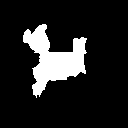

In [67]:
convert_to_rgb(ref_mask)

In [70]:
ent_segmentation = grabcut_from_rough_mask(rough_ent, img)
img_seq = [apply_mask(test_frame, rough_ent), apply_mask(test_frame, ent_segmentation)]
# show_images_horizontally(img_seq)

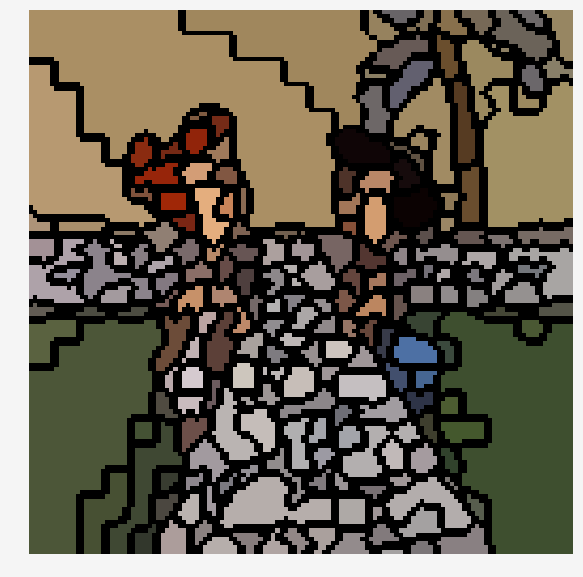

In [741]:
out = color.label2rgb(img_regions, img, kind='avg')
out = mark_boundaries(out, img_regions, (0, 0, 0))

_ = plt.imshow(out)
_ = plt.axis("off")

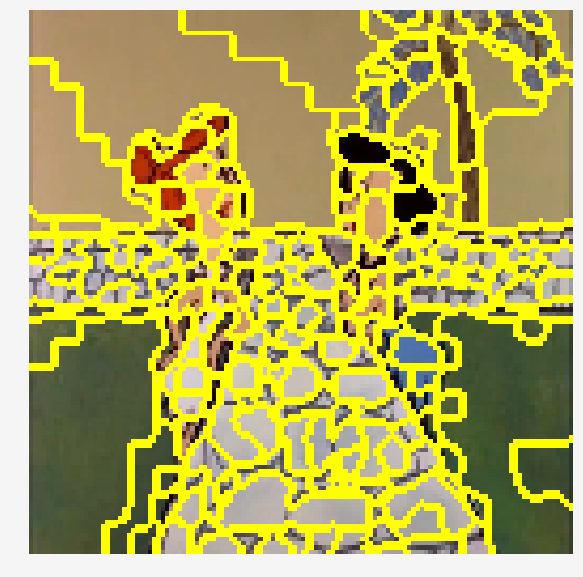

In [695]:
_ = plt.imshow(mark_boundaries(test_frame, img_regions))
_ = plt.axis("off")

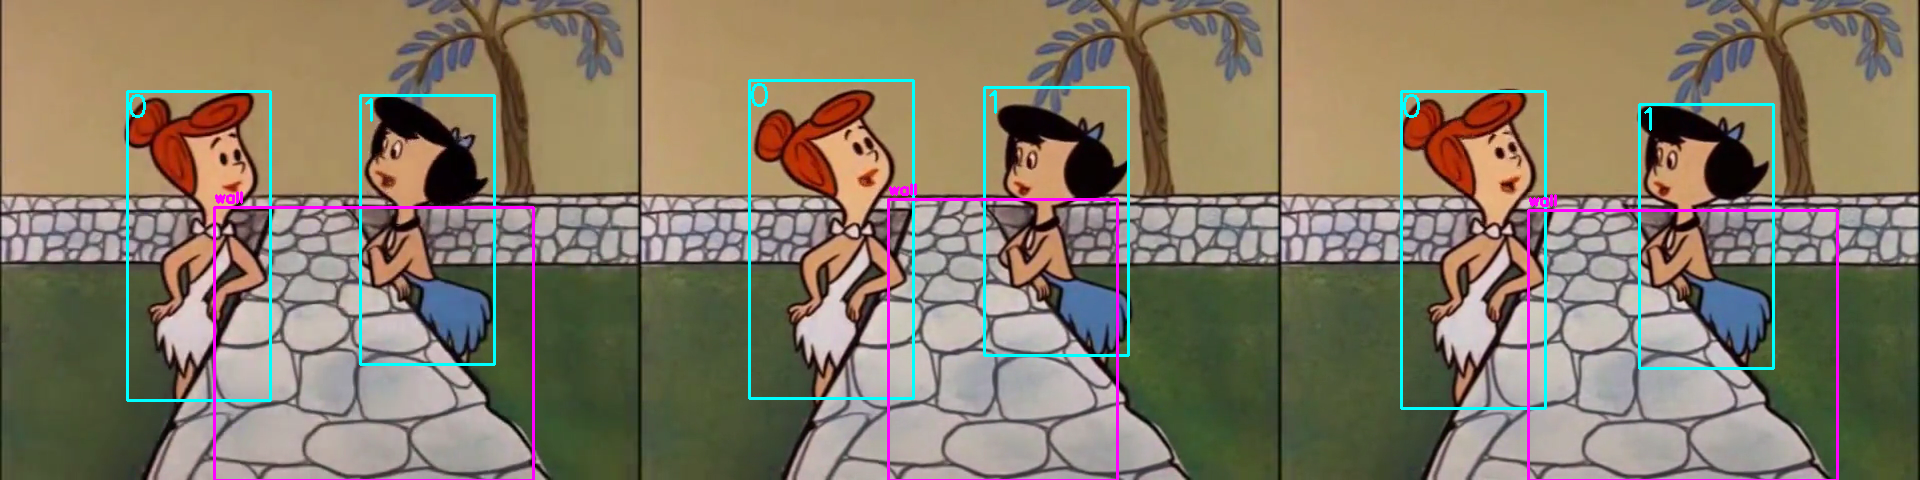

In [495]:
test_vid.display_bounding_boxes()

In [ ]:
_ = plt.imshow(mark_boundaries(orig_frame, segments))
_ = plt.axis("off")

## 8.7 labelme annotation

In [41]:
import labelme
from copy import deepcopy

In [399]:
from anigen_tools.hybrid_segmentation import compute_iou

In [2]:
sample_anno = 's_01_e_08_shot_003729_003803_suit_1_6_bb.png,(482,306),(551,290),(551,394),(541,454),(450,454),(435,369)'

In [37]:
ent_id, coords = sample_anno.split(',', maxsplit=1)

In [56]:
vertices_arr = np.array([c.split(')')[0].split(',') for c in coords.split('(') if c], dtype=np.float32)

In [202]:
test_vid = get_vid('s_01_e_08_shot_003729_003803')

In [197]:
test_img = test_vid.get_key_frame_images()[0]
# test_img.save('test_frame.png')

# with open('./test_frame.json') as f:
#     labelme_anno = json.load(f)

In [198]:
test_char = test_vid.data()['objects'][1]

In [73]:
segm_problem_video = 's_01_e_03_shot_023155_023229'
test_vid = get_vid(segm_problem_video)

test_char = test_vid.data()['objects'][0]
seg_mask = gen_single_segmentation(test_vid, test_char, n_segments=500)

In [76]:
b2_df = pd.read_pickle('../turk_annotation_task/segm_anno/poly_segm_res.pkl')

In [77]:
b2_df.head()

a_id  \
0  34S9DKFK74P1MYQOCV2G1L7NCSWNYW   
1  3FDJT1UU7582C4V14G53YWSQNSNK58   
2  3GGAI1SQEWYI1D4J425RRFQ43D3MCJ   
3  3CFJTT4SXUQQTDJWS6ZOJ0R9LTSI76   
4  3D8YOU6S9FKCY40R3DJAWPFOKDVU6R   

                                         ent_id  \
0           s_01_e_08_shot_001903_001977_char_0   
1  s_04_e_17_shot_030776_030850_eye shadow_0_16   
2           s_01_e_03_shot_023155_023229_char_0   
3           s_01_e_03_shot_019734_019808_char_0   
4           s_05_e_22_shot_017017_017091_char_0   

                             h_id  \
0  3UY4PIS8QSL198HRA4Q5YE1S8U01NQ   
1  3OZ4VAIBEYFLCU642KI2CVRROE2JVT   
2  3V8JSVE8YZQU58FHTUUVMEIT1N8EYC   
3  31JUPBOORO4TW8YRXCJ50WKBH56L8S   
4  3T2HW4QDUW7079NVPRWKX9PZ72A9CP   

                                                poly  \
0  ((164, 201), (164, 164), (168, 144), (136, 140...   
1  ((327, 206), (318, 202), (311, 205), (311, 214...   
2  ((180, 402), (212, 349), (221, 332), (218, 322...   
3  ((239, 477), (518, 475), (519, 458), (534, 434...   
4  ((290, 100), (298, 118), (305, 109), (308, 101...   

                           v_id       worker_id  n_points  
0  s_01_e_08_shot_001903_001977   AVNETQM99TKA7        55  
1  s_04_e_17_shot_030776_030850  A2KXARDIOGJL8T        10  
2  s_01_e_03_shot_023155_023229  A24F42H3K58D8A        45  
3  s_01_e_03_shot_019734_019808  A24F42H3K58D8A        31  
4  s_05_e_22_shot_017017_017091   AFSB8WBSUU2B4        76

In [151]:
sorted_df[sorted_df['worker_id'] == 'ALGVMVD50EC04']

a_id                                    ent_id  \
45   32UTUBMZ7HWIHV6M4UAN3R3ZCLFVB2       s_03_e_25_shot_042570_042644_char_0   
188  3L0KT67Y8FGY2BITKRJ20FHTYQ3SY9  s_03_e_17_shot_041699_041773_costume_0_5   
109  3L6L49WXW1XHY26YJOINRF3UQ6X543     s_05_e_09_shot_040095_040169_bed,_0_5   
53   3UJ1CZ6IZIP00N899PE5PIJ04M05SA     s_04_e_26_shot_016234_016308_hat_1_11   
214  3ZAK8W07I5EHKTEC1O3TNO5X8BA0U0    s_04_e_18_shot_011352_011426_desk_0_11   
58   3VW04L3ZLU6HYNEI953NG9RCBZBXXG       s_04_e_08_shot_004004_004078_char_0   
73   345LHZDEDYSD1LD9KBLCPM34BNU3UY   s_02_e_17_shot_014483_014557_chair_1_18   
147  3WYP994K18RTFDKWDEGZZAL1G16Y6T       s_02_e_30_shot_033348_033422_char_0   
172  3D3VGR7TA1FLLTLSGHQ7KBGK4OQ3RU       s_06_e_07_shot_042740_042814_char_0   

                               h_id  \
45   3EKZL9T8Y9MTMF5EN3KCAQNNQFICHI   
188  3PMR2DOWOP1EBI84TMDL2V89TTA45G   
109  3W5PY7V3UQ72GO197V5MJUVL6V3YJG   
53   3538U0YQ1GULVJIPZKLBE27G4NSF3P   
214  3M67TQBQQIOCEUQX5D0TREZB7ZP9AN   
58   3421H3BM9BHNFNT1ZJD6KD2UXMJ9J3   
73   335VBRURDK0F4779LI2FNXP2SEN9EI   
147  3WGCNLZJKG8SNWQELAC229PYUQY1D8   
172  3VQTAXTYN4LFHWJS92VGIL6V22KBUB   

                                                  poly  \
45      ((218, 52), (474, 51), (475, 476), (222, 476))   
188   ((477, 318), (603, 310), (592, 468), (452, 473))   
109  ((8, 240), (135, 232), (186, 279), (226, 231),...   
53   ((158, 233), (137, 238), (147, 215), (143, 187...   
214  ((138, 368), (96, 373), (95, 403), (115, 427),...   
58   ((275, 101), (239, 130), (270, 139), (270, 185...   
73   ((574, 217), (587, 216), (583, 241), (598, 243...   
147  ((518, 299), (556, 476), (387, 474), (361, 444...   
172  ((258, 257), (265, 244), (271, 240), (285, 200...   

                             v_id      worker_id  n_points  
45   s_03_e_25_shot_042570_042644  ALGVMVD50EC04         4  
188  s_03_e_17_shot_041699_041773  ALGVMVD50EC04         4  
109  s_05_e_09_shot_040095_040169  ALGVMVD50EC04        10  
53   s_04_e_26_shot_016234_016308  ALGVMVD50EC04        12  
214  s_04_e_18_shot_011352_011426  ALGVMVD50EC04        12  
58   s_04_e_08_shot_004004_004078  ALGVMVD50EC04        20  
73   s_02_e_17_shot_014483_014557  ALGVMVD50EC04        22  
147  s_02_e_30_shot_033348_033422  ALGVMVD50EC04        26  
172  s_06_e_07_shot_042740_042814  ALGVMVD50EC04        35

In [94]:
sorted_df = b2_df.sort_values('n_points')

In [174]:
sorted_df.iloc[0:10]

a_id                                    ent_id  \
57   3OS4RQUCRAFTLYKW4F5JL50DPSSFB2   s_01_e_25_shot_017596_017670_script_0_9   
20   39RP059MEITZR8CDQ29WGVKMMT4MBG   s_02_e_17_shot_014483_014557_elbow_1_12   
45   32UTUBMZ7HWIHV6M4UAN3R3ZCLFVB2       s_03_e_25_shot_042570_042644_char_0   
96   3KGTPGBS6YLOG3HQGB776CYC48TU2A       s_03_e_18_shot_025408_025482_char_0   
180  3CPLWGV3MPZMLXIG4JA024EW3JB9NT       s_02_e_18_shot_023725_023799_char_1   
188  3L0KT67Y8FGY2BITKRJ20FHTYQ3SY9  s_03_e_17_shot_041699_041773_costume_0_5   
192  351SEKWQS1HS65AX4Y02BL8MODFMDJ      s_02_e_01_shot_030444_030518_cap_2_9   
194  37U1UTWH9WM7MQRYSYL3BSOVKAI8RR    s_04_e_22_shot_021109_021183_roof_0_16   
111  3G5W44VEU8I0S1KLLCOU2TJFC00KGM    s_02_e_03_shot_036993_037067_shirt_1_5   
112  3GS6S824SRXXXTVOXUKSGOM70JVNWT       s_03_e_22_shot_029491_029565_char_0   

                               h_id  \
57   3W1K7D6QSCHW3VD2FPUOZDLA4KZBZ0   
20   3IH9TRB0FCZ9V760DODDT65BMV61IA   
45   3EKZL9T8Y9MTMF5EN3KCAQNNQFICHI   
96   3GV1I4SEOAP6SUF34XM7GIOKBAG6LR   
180  32204AGAACC63RLJPPGV0H82O7AHGX   
188  3PMR2DOWOP1EBI84TMDL2V89TTA45G   
192  3DQYSJDTYMB553P7OY8T30BKZHEEX6   
194  30ZKOOGW2X6UPPN210L0C8HS9N11A6   
111  30OITAWPBR3ROHYBBJAL80MFKUFH96   
112  33BFF6QPI2BN654KP9VBIQTGZQI3WB   

                                                  poly  \
57                                          (304, 284)   
20                ((563, 225), (576, 225), (564, 251))   
45      ((218, 52), (474, 51), (475, 476), (222, 476))   
96      ((388, 53), (551, 55), (553, 406), (390, 406))   
180   ((152, 142), (151, 364), (347, 364), (347, 141))   
188   ((477, 318), (603, 310), (592, 468), (452, 473))   
192       ((260, 19), (260, 38), (276, 39), (278, 18))   
194       ((195, 7), (481, 138), (638, 152), (638, 5))   
111   ((220, 278), (408, 276), (409, 477), (221, 478))   
112  ((180, 112), (297, 111), (298, 478), (120, 477...   

                             v_id       worker_id  n_points  
57   s_01_e_25_shot_017596_017670  A1LZWU72K42V92         2  
20   s_02_e_17_shot_014483_014557  A1Z37HK53J8S87         3  
45   s_03_e_25_shot_042570_042644   ALGVMVD50EC04         4  
96   s_03_e_18_shot_025408_025482  A36KTM4CGRWV70         4  
180  s_02_e_18_shot_023725_023799  A35ON5YN1HY1H6         4  
188  s_03_e_17_shot_041699_041773   ALGVMVD50EC04         4  
192  s_02_e_01_shot_030444_030518  A24F42H3K58D8A         4  
194  s_04_e_22_shot_021109_021183   AM86ZA21GS08F         4  
111  s_02_e_03_shot_036993_037067  A36KTM4CGRWV70         4  
112  s_03_e_22_shot_029491_029565  A1Z0KYB5YLUO0A         5

s_03_e_16_shot_034648_034722_char_0
3SKRO2GZ72R3OMUI3T3RV6F9BCI1K7


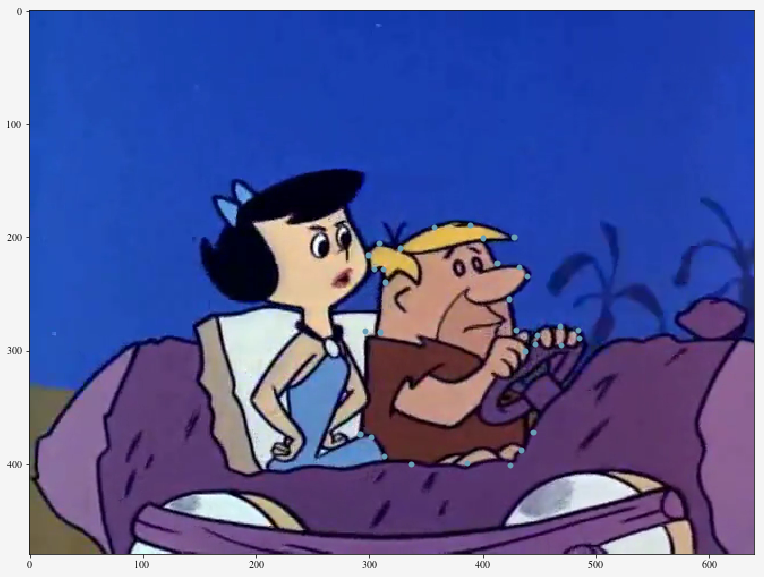

In [195]:
row_n = 16
test_vid = sorted_df['v_id'].iloc[row_n]
test_poly = sorted_df['poly'].iloc[row_n]
print(sorted_df['ent_id'].iloc[row_n])
print(sorted_df['a_id'].iloc[row_n])

test_img = get_vid(test_vid).get_key_frame_images()[1]

# ent_poly = np.array(labelme_anno['shapes'][1]['points'])
ent_poly = test_poly
anno_mask = labelme.utils.polygons_to_mask((480, 640), ent_poly).astype(np.uint8)
rescaled_anno_mask = np.array(pil.fromarray(anno_mask).resize((128, 128)))

compute_iou(rescaled_anno_mask, seg_mask)

plt.imshow(test_img)
ent_poly = np.array(ent_poly)
_ =plt.plot(ent_poly[:,0], ent_poly[:,1], 'o')
# plt.plot(wilma_poly[hull.vertices,0], wilma_poly[hull.vertices,1], 'r--', lw=2)

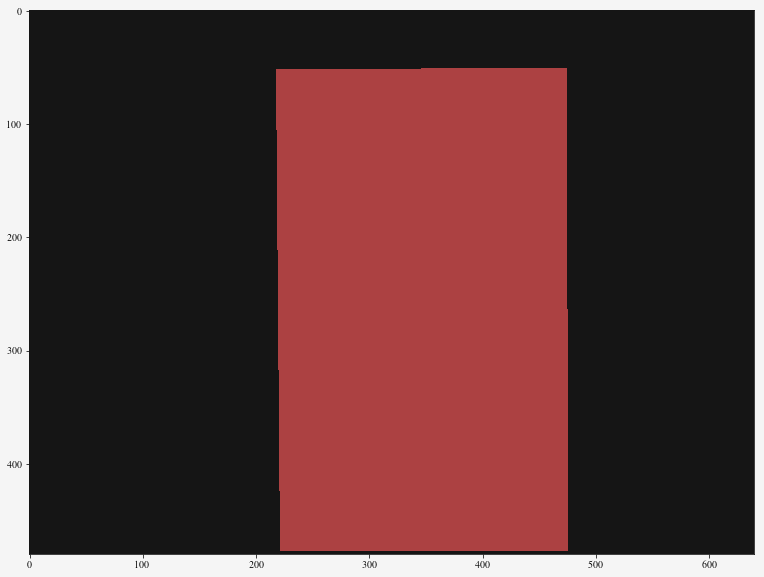

In [178]:
_ = plt.imshow(anno_mask)

In [74]:
# get_vid('s_01_e_03_shot_023155_023229')

# 9. hide

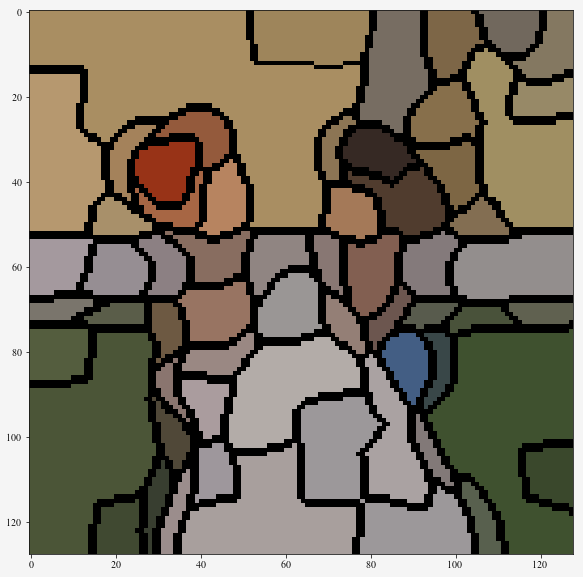

In [1180]:
_ = plt.imshow(out)

segments = slic(orig_frame, n_segments = 100, sigma = 5, multichannel=True, convert2lab=True, compactness=10)

_ = plt.imshow(mark_boundaries(orig_frame, segments))
_ = plt.axis("off")

In [ ]:
import skimage
from skimage import measure
regions = measure.regionprops(exp_segm, intensity_image=orig_frame)

In [1184]:
# print([r.area for r in regions])a
# print([r. for r in regions])

# mc = [orig_frame[:, :, i].mean() for i in range(orig_frame.shape[-1])]

# segments = slic(img_clusters, n_segments = n_segments, sigma = 5, multichannel=True, convert2lab=True, compactness=10)

# _ = plt.imshow(mark_boundaries(img_clusters, segments))
# _ = plt.axis("off")

In [ ]:
ent = test_ents[0]
ent_mask = np.load(os.path.join(data_dir, segmentation_dir, ent.gid() + '_segm.npy.npz'))['arr_0'].astype(np.uint64)
ent_mask2 = np.load(os.path.join(data_dir, segmentation_dir, test_ents[1].gid() + '_segm.npy.npz'))['arr_0'].astype(np.uint64)

In [1294]:
# def weight_mean_color(graph, src, dst, n):
#     diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
#     diff = np.linalg.norm(diff)
#     return {'weight': diff}


# def merge_mean_color(graph, src, dst):
#     graph.node[dst]['total color'] += graph.node[src]['total color']
#     graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
#     graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
#                                      graph.node[dst]['pixel count'])

# def create_entity_segment(ent, frame_size=(128, 128)):
#     segment = np.zeros(frame_size, dtype=np.uint8)
#     rect = scale_box(np.array(ent.rect())[1])
#     segment[rect[0]: rect[2], rect[1]: rect[3]] = 1
#     return segment.T


# def partition_image(img, n_segments):
#     superpixels = slic(img, n_segments, sigma = 5, multichannel=True, convert2lab=True, compactness=10)
#     ent_rag = graph.rag_mean_color(img, labels)

#     regions = graph.merge_hierarchical(superpixels, g, thresh=10, rag_copy=False,
#                                        in_place_merge=True,
#                                        merge_func=merge_mean_color,
#                                        weight_func=weight_mean_color)
# #     out = color.label2rgb(regions, img, kind='avg')
# #     out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
#     return regions


# def rough_segment(regions, bbox_mask, frame, inclusion_thresh=0.7):
#     wilma_reg_overlaps = []
#     for reg in np.unique(regions):
#         reg_mask = regions == reg
#         reg_mask = reg_mask.astype(np.uint8)
#         reg_iou = aiou(bbox_mask, reg_mask)[2]
#         wilma_reg_overlaps.append(reg_iou)
#     overlapping_regions = pd.Series(wilma_reg_overlaps).sort_values(ascending=False)
#     regions_to_include = overlapping_regions.index[overlapping_regions > inclusion_thresh]
#     ent_segment = np.isin(regions, regions_to_include).astype(np.uint8)
# #     masked_ent = frame * np.tile(np.expand_dims(ent_segment, 2), [1, 1, 3])
#     return ent_segment


# def grabcut_from_rough_mask(ent_mask, img):
#     mask = np.where(ent_mask == 1, cv2.GC_PR_FGD, 0).astype('uint8')
#     mask[ent_mask == 0] = cv2.GC_BGD
#     # mask[newmask == 255] = cv2.GC_FGD
#     bgdModel = np.zeros((1,65),np.float64)
#     fgdModel = np.zeros((1,65),np.float64)
# #     return mask
#     mask, bgdModel, fgdModel = cv2.grabCut(img, mask, None, bgdModel, fgdModel, 1 ,cv2.GC_INIT_WITH_MASK)
#     mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
#     img = img * mask[:,:,np.newaxis]
#     return img


# def segment_entity(frame, entity, n_segments=100):
#     img = deepcopy(frame)
#     img_regions = partition_image(img, n_segments)
#     ent_bbox = create_entity_segment(entity)
#     rough_ent = rough_segment(img_regions, ent_bbox, img)
# #     return rough_ent
#     ent_segmentation = grabcut_from_rough_mask(rough_ent, img)
#     return ent_segmentation